In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def load_data(fname):
    sents = []
    with open(fname) as f:
        for line in f:
            sents.append(line.strip().split(' '))
    return sents

In [3]:
data_en = load_data('train.en')
data_jp = load_data('train.jp')


In [4]:
def distribution(data):
    num = []
    dis = {}
    for i in range(len(data)):
        num.append(len(data[i]))
    for i in sorted(num):
        if i in dis.keys():
            dis[i] += 1
        else:
            dis[i] = 1
    x = list(dis.keys())
    y = list(dis.values())
    pearson_corr = stats.pearsonr(x,y)
    spearman_corr = stats.spearmanr(x,y)
    return num, dis, pearson_corr[0], spearman_corr[0]     

In [5]:
num_en, dis_en,pearson_corr_en, spearman_corr_en = distribution(data_en)
num_jp, dis_jp,pearson_corr_jp, spearman_corr_jp = distribution(data_jp)

In [6]:
print('''pearson correlation of English is {}, Japanese is {}; 
       Spearman correlation of English is {}, Japanese is {}'''.format(
        pearson_corr_en,pearson_corr_jp,spearman_corr_en,spearman_corr_jp))

pearson correlation of English is -0.5624584932961707, Japanese is -0.5608380587223111; 
       Spearman correlation of English is -0.8460908061132236, Japanese is -0.7818490166757308


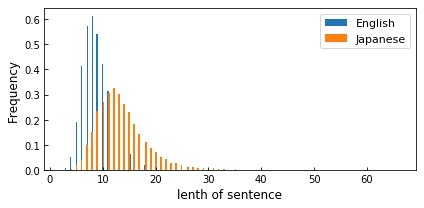

In [7]:
fig_1 = plt.figure(figsize=(6, 3))
ax_1 = fig_1.add_subplot(111)

num_of_bins = 200

ax_1.hist(num_en, density = True,bins = num_of_bins,label = 'English')
ax_1.hist(num_jp, density = True,bins = num_of_bins,label = 'Japanese')

ax_1.legend(loc='best',fontsize=11)

ax_1.set_xlabel('lenth of sentence',fontsize = 12)
ax_1.set_ylabel('Frequency',fontsize=12)
ax_1.tick_params(direction = 'in')
fig_1.tight_layout()
fig_1.savefig('distribution of lengh of sentences.pdf')

In [8]:
en_tokens = sum(num_en)
jp_tokens = sum(num_jp)

In [9]:
def word(data):
    word = {}
    for i in data:
        for j in i:
            if j in word:
                word[j] += 1
            else:
                word[j] = 1
    return word

In [10]:
word_en = word(data_en)
word_jp = word(data_jp)

In [11]:
len(word_en.keys()),len(word_jp.keys())

(7040, 8059)

In [12]:
def unk_num(word):
    unk = 0
    for i in word.keys():
        if word[i] == 1:
            unk += 1
    return unk
    

In [13]:
unk_en = unk_num(word_en)
unk_jp = unk_num(word_jp)

In [14]:
unk_en, unk_jp

(3331, 4114)

In [15]:
word_en

{'i': 2207,
 'like': 221,
 'my': 643,
 'steak': 3,
 'medium': 3,
 '.': 9192,
 'there': 311,
 'is': 1759,
 'no': 210,
 'doubt': 8,
 'as': 445,
 'to': 2646,
 'her': 458,
 'beauty': 10,
 'all': 278,
 'the': 4335,
 'houses': 3,
 'in': 1343,
 'this': 623,
 'neighborhood': 4,
 'look': 76,
 'so': 183,
 'much': 109,
 'alike': 2,
 'that': 723,
 'can': 360,
 '&apos;t': 607,
 'tell': 67,
 'them': 71,
 'apart': 8,
 'have': 596,
 'you': 1492,
 'ever': 45,
 'watched': 10,
 'sumo': 1,
 'wrestling': 2,
 '?': 882,
 'he': 1694,
 'failed': 14,
 'his': 689,
 'attempt': 7,
 'swim': 18,
 'across': 31,
 'river': 30,
 'get': 182,
 'touch': 19,
 'with': 556,
 'me': 525,
 'soon': 75,
 'arrive': 9,
 'here': 127,
 'how': 162,
 'about': 195,
 'going': 89,
 'for': 767,
 'a': 2060,
 'walk': 50,
 'after': 116,
 'lunch': 14,
 'sight': 18,
 'of': 1438,
 'him': 359,
 'was': 794,
 'hateful': 1,
 'rumor': 7,
 'spread': 7,
 'far': 48,
 'and': 502,
 'wide': 6,
 'old': 102,
 'people': 134,
 'are': 458,
 'inclined': 3,
 'back

In [17]:
jp_tokens

136900